In [1]:
import pandas as pd
data=pd.read_excel("C:/Users/waghs/Desktop/DATTTTA.xlsx")

In [25]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


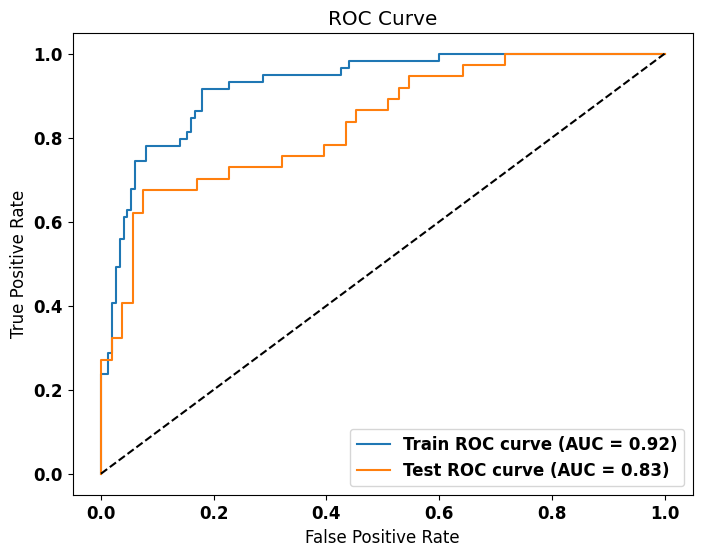

Training Set Metrics:
Accuracy: 0.8803827751196173
Precision: 0.8148148148148148
Recall: 0.7457627118644068
F1-Score: 0.7787610619469026
ROC AUC Score: 0.924180790960452

Testing Set Metrics:
Accuracy: 0.7888888888888889
Precision: 0.875
Recall: 0.5675675675675675
F1-Score: 0.6885245901639344
ROC AUC Score: 0.8342682304946456


In [48]:
#logistic without cross validation
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X1 = data.iloc[:, :12]  # First 12 columns as features
y = data.iloc[:, 12]   # Last column as target variable

# Identify numerical and categorical features
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", 
                      "platelets", "serum_creatinine", "serum_sodium", "time"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

# Split data into features and target variable
X = X1[numerical_features + categorical_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Create dummy variables for categorical features
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate ROC AUC score
train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (AUC = {:.2f})'.format(train_roc_auc))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (AUC = {:.2f})'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)

In [5]:
### Make predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, y_test_pred)

# Print the results
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("AUC-ROC:", train_auc_roc)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("AUC-ROC:", test_auc_roc)

cm = confusion_matrix(y_train_pred, y_train)
print(cm)

Training Set Metrics:
Accuracy: 0.8803827751196173
Precision: 0.8148148148148148
Recall: 0.7457627118644068
F1-Score: 0.7787610619469026
AUC-ROC: 0.8395480225988701

Testing Set Metrics:
Accuracy: 0.7888888888888889
Precision: 0.875
Recall: 0.5675675675675675
F1-Score: 0.6885245901639344
AUC-ROC: 0.755481896991331
[[140  15]
 [ 10  44]]


In [28]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Assuming 'X_train' and 'y_train' are your training data
X_train_sm = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X_train_sm).fit()

# Access coefficients and p-values
coefs = log_reg.params[1:]  # Exclude the intercept
p_values = log_reg.pvalues[1:]

Signi = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefs, 'p-value': p_values.round(4)})
print(Signi)

Optimization terminated successfully.
         Current function value: 0.309325
         Iterations 8
                                           Feature  Coefficient  p-value
age                                            age     0.753444   0.0029
anaemia                                    anaemia    -0.388538   0.4366
creatinine_phosphokinase  creatinine_phosphokinase     0.078308   0.7105
diabetes                                  diabetes     0.154849   0.7418
ejection_fraction                ejection_fraction    -0.981694   0.0002
high_blood_pressure            high_blood_pressure    -0.273453   0.5660
platelets                                platelets    -0.239042   0.3217
serum_creatinine                  serum_creatinine     0.897255   0.0001
serum_sodium                          serum_sodium    -0.296369   0.2115
sex                                            sex    -1.202001   0.0276
smoking                                    smoking     0.487026   0.4042
time                  

                     feature        VIF
0                        age  29.114744
1                    anaemia   1.909994
2   creatinine_phosphokinase   1.448473
3                   diabetes   1.789419
4          ejection_fraction  12.081364
5        high_blood_pressure   1.646044
6                  platelets   8.641813
7           serum_creatinine   2.919913
8               serum_sodium  59.151991
9                        sex   3.795155
10                   smoking   1.892753
11                      time   4.351441


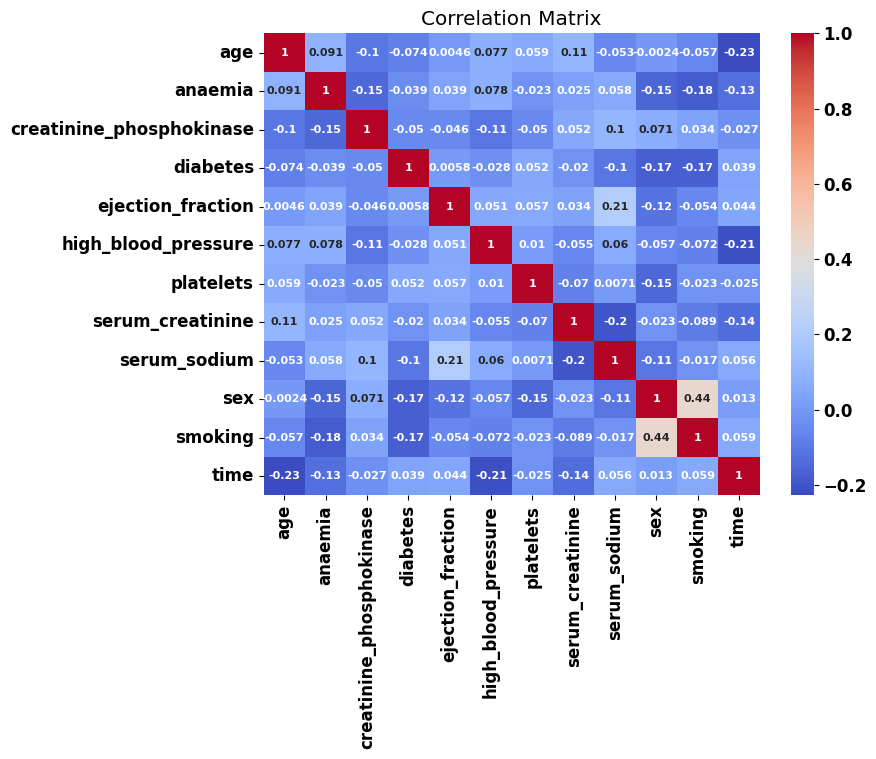

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Assuming 'X_train' is your training data
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif_data)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 8})  # Adjust fontsize as needed
plt.title('Correlation Matrix')
plt.show()

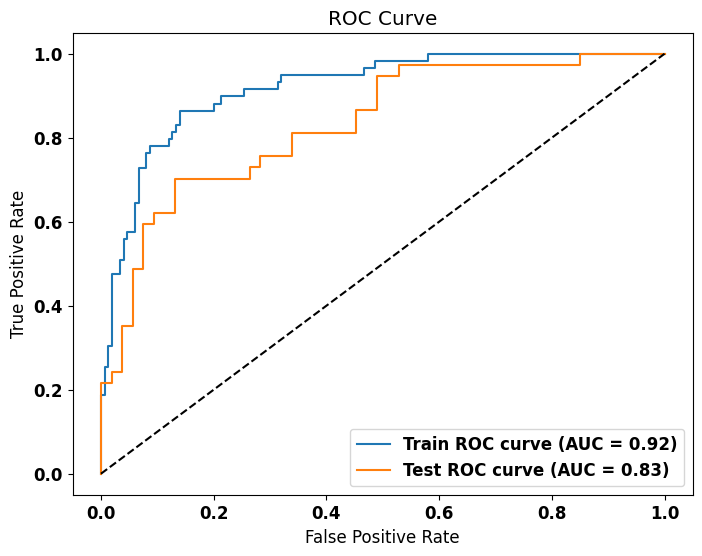

Training Set Metrics:
Accuracy: 0.8708133971291866
Precision: 0.7962962962962963
Recall: 0.7288135593220338
F1-Score: 0.7610619469026548
ROC AUC Score: 0.9184180790960452

Testing Set Metrics:
Accuracy: 0.7777777777777778
Precision: 0.84
Recall: 0.5675675675675675
F1-Score: 0.6774193548387096
ROC AUC Score: 0.831718510963794


In [50]:
# Logistic After eliminating the insignificant regressors

numerical_features = ["age", "ejection_fraction", "serum_creatinine", "time"]
categorical_features = ["sex"]

# Split data into features and target variable
X = X1[numerical_features + categorical_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Create dummy variables for categorical features
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate ROC AUC score
train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (AUC = {:.2f})'.format(train_roc_auc))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (AUC = {:.2f})'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)



2-Fold CV Accuracy: 0.5523713646532438
3-Fold CV Accuracy: 0.7055892255892257
4-Fold CV Accuracy: 0.7655855855855855
5-Fold CV Accuracy: 0.7689265536723163
6-Fold CV Accuracy: 0.8055782312925169
7-Fold CV Accuracy: 0.8023255813953488
8-Fold CV Accuracy: 0.8095661450924608
9-Fold CV Accuracy: 0.809863339275104
10-Fold CV Accuracy: 0.8122988505747125
11-Fold CV Accuracy: 0.8167388167388168
12-Fold CV Accuracy: 0.8122222222222222
13-Fold CV Accuracy: 0.8227424749163877
14-Fold CV Accuracy: 0.8099876314162027
15-Fold CV Accuracy: 0.822280701754386
16-Fold CV Accuracy: 0.8146929824561404
17-Fold CV Accuracy: 0.8221837754709727
18-Fold CV Accuracy: 0.8184232026143792
19-Fold CV Accuracy: 0.8177631578947367


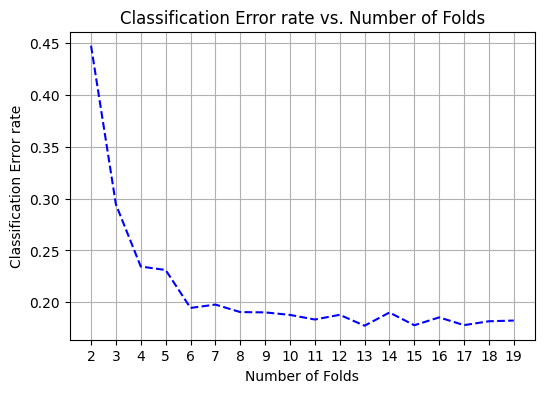

In [6]:
##Logistic Regression with K-Fold Cross Validation
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#K-Fold Cross validation
for i in range(2, 20):
    model = LogisticRegression()
    scores = cross_val_score(model, X, y, cv=i, scoring='accuracy')
    print(f"{i}-Fold CV Accuracy:", scores.mean())

error_rates = []
for i in range(2, 20):
    model = LogisticRegression()
    scores = cross_val_score(model, X, y, cv=i, scoring='accuracy')
    error_rates.append(1 - scores.mean())  ##error= 1 - accuracy

## Plot the graph
plt.figure(figsize=(6, 4))  # Adjust figure size
plt.plot(range(2, 20), error_rates, linestyle='--', color='blue')
plt.xticks(range(2, 20))  # Set integer x-axis ticks
plt.xlabel("Number of Folds")
plt.ylabel("Classification Error rate")
plt.title("Classification Error rate vs. Number of Folds")
plt.grid(True)
plt.show()

In [8]:
# Logistic with Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loocv, scoring='accuracy')
print("LOOCV Accuracy:", scores.mean())
print("LOOCV Error rate:",1-scores.mean())

LOOCV Accuracy: 0.8260869565217391
LOOCV Error rate: 0.17391304347826086


Training Set Metrics:
Accuracy: 0.9090909090909091
Precision: 0.8225806451612904
Recall: 0.864406779661017
F1-Score: 0.8429752066115702

Testing Set Metrics:
Accuracy: 0.8111111111111111
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1-Score: 0.7605633802816901


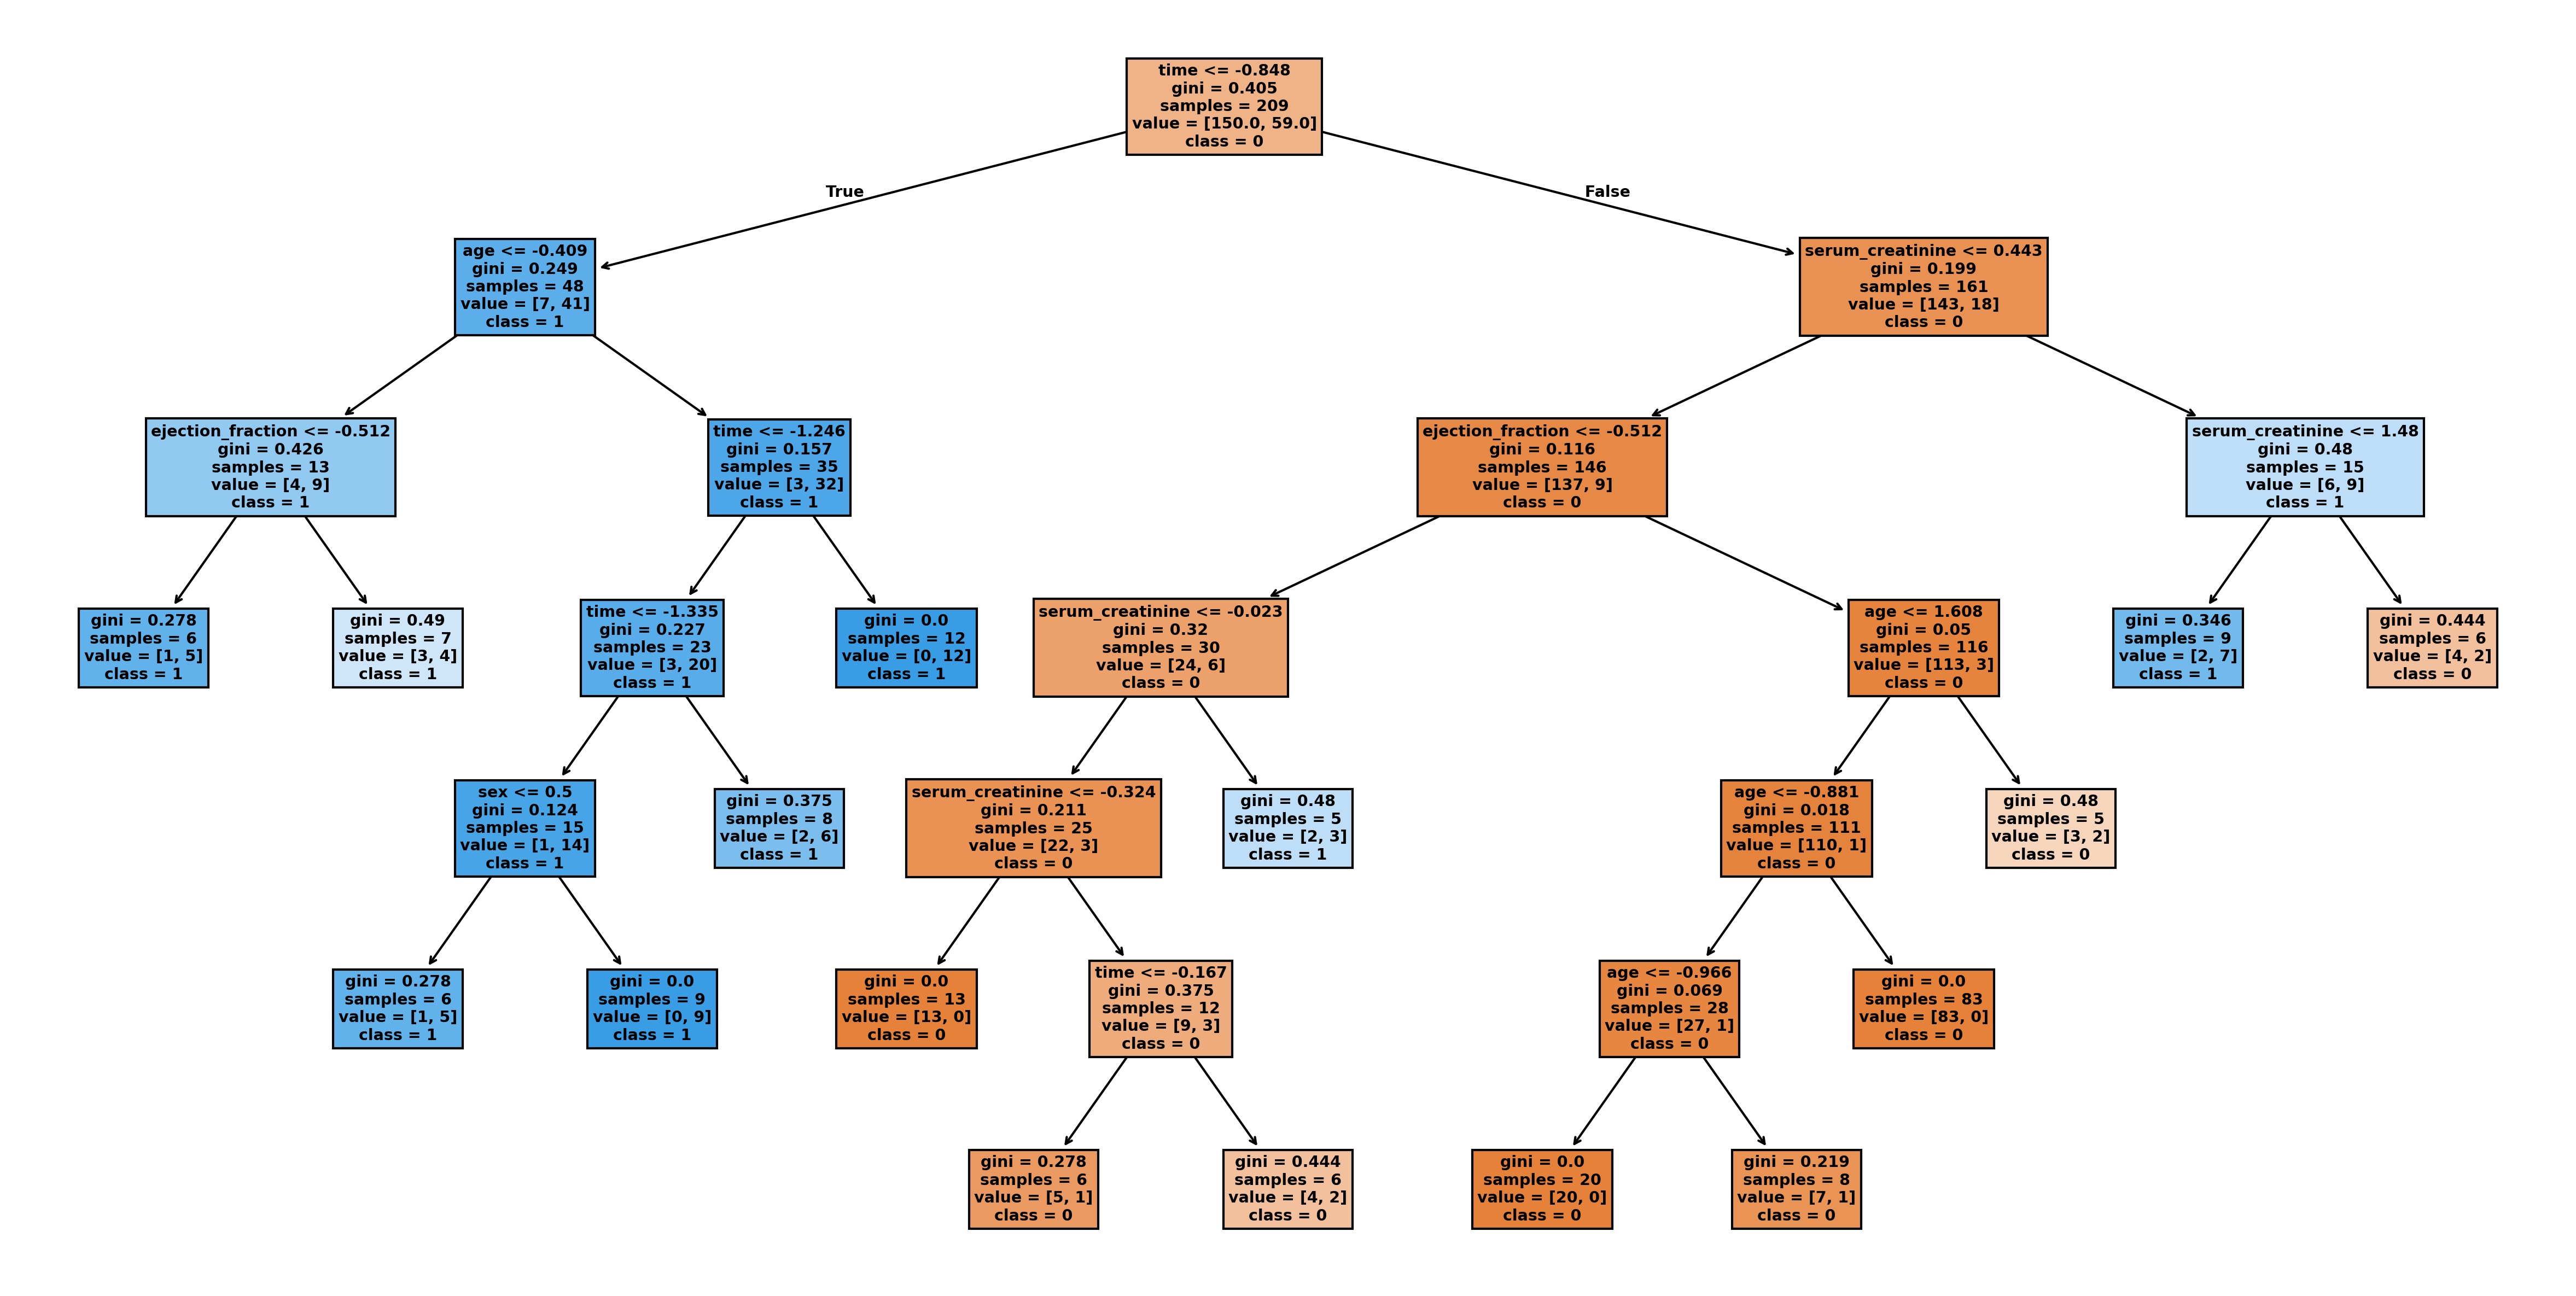

In [51]:
#Classification using decision Tree
# Import libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(min_samples_leaf=5)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Evaluate on the testing set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

plt.figure(figsize=(20, 10), dpi=300)
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

0.007070707070707071


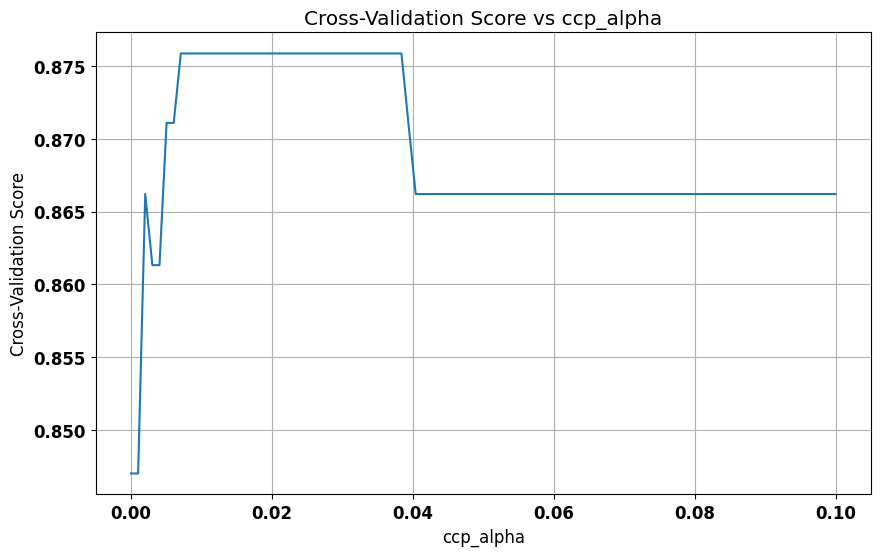

Training Set Metrics:
Accuracy: 0.8995215311004785
Precision: 0.7794117647058824
Recall: 0.8983050847457628
F1-Score: 0.8346456692913385

Testing Set Metrics:
Accuracy: 0.7888888888888889
Precision: 0.75
Recall: 0.7297297297297297
F1-Score: 0.7397260273972602


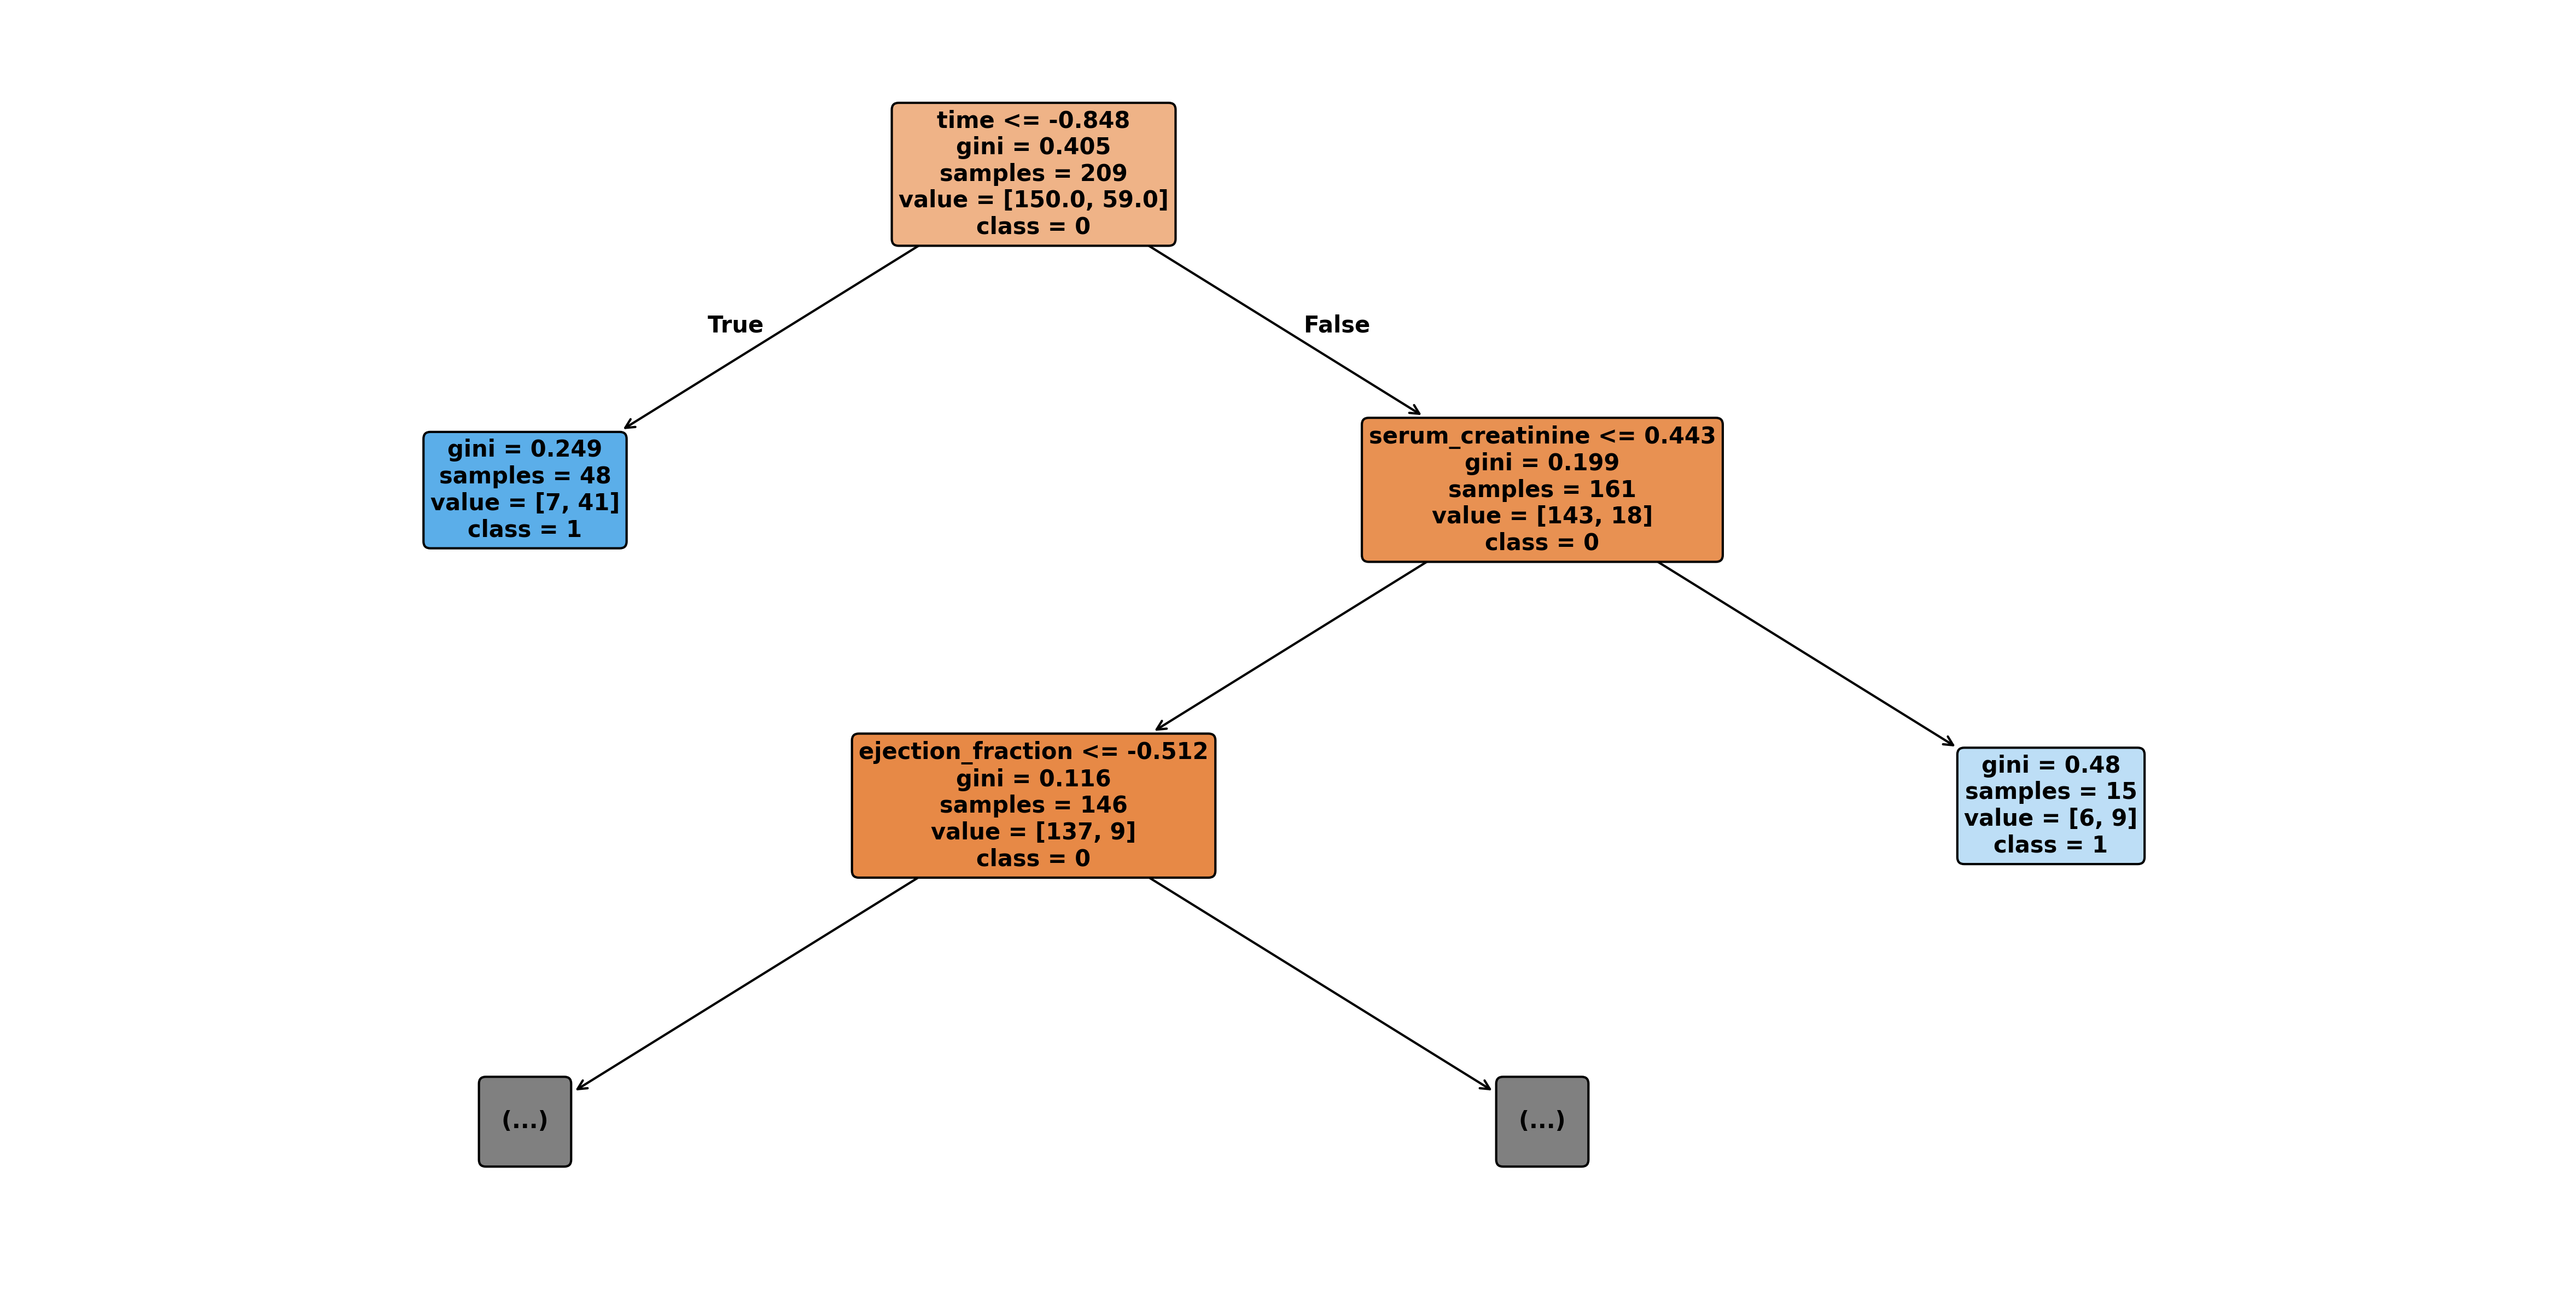

In [74]:
#Classification using pruned decision Tree
# Import libraries
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#To choose optimal value of ccp_alpha
from sklearn.model_selection import cross_val_score
# Define a range of ccp_alpha values to test
ccp_alphas = np.linspace(0, 0.1, 100)
# Create a list to store the cross-validation scores for each ccp_alpha
scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=5, ccp_alpha=ccp_alpha)
    score = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(score.mean())

# Find the optimal ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmax(scores)]
print(optimal_ccp_alpha)

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, scores)
plt.xlabel('ccp_alpha')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs ccp_alpha')
plt.grid(True)
plt.show()

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(min_samples_leaf=5,ccp_alpha=optimal_ccp_alpha)


# Train the classifier on the training data
clf.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)


print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Evaluate on the testing set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

plt.figure(figsize=(20,10), dpi=300)
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'], 
          fontsize=10, rounded=True, max_depth=2)  # Adjust max_depth for pruning
plt.show()